In [6]:
import pandas as pd

bank_additional_full = pd.read_csv('bank-additional-full.csv', delimiter=';')
bank_additional_full.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


# Exploratory Data Analysis

In [7]:
bank_additional_full.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

Make a median object for all "int" categories to plot the data of the median instead of the sum

In [8]:
numerical_data = bank_additional_full.select_dtypes(include=['int64', 'float64'])

In [9]:
numerical_data

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,56,261,1,999,0,1.1,93.994,-36.4,4.857,5191.0
1,57,149,1,999,0,1.1,93.994,-36.4,4.857,5191.0
2,37,226,1,999,0,1.1,93.994,-36.4,4.857,5191.0
3,40,151,1,999,0,1.1,93.994,-36.4,4.857,5191.0
4,56,307,1,999,0,1.1,93.994,-36.4,4.857,5191.0
...,...,...,...,...,...,...,...,...,...,...
41183,73,334,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41184,46,383,1,999,0,-1.1,94.767,-50.8,1.028,4963.6
41185,56,189,2,999,0,-1.1,94.767,-50.8,1.028,4963.6
41186,44,442,1,999,0,-1.1,94.767,-50.8,1.028,4963.6


Check For Missing Values in the bank_additional_full dataset

In [10]:
bank_additional_full.isna().sum()

,0
age,0
job,0
marital,0
education,0
default,0
housing,0
loan,0
contact,0
month,0
day_of_week,0


In [11]:
import plotly.express as px
import matplotlib
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
# inline makes the graph output in the cells
%matplotlib inline

sns.set_style("white")
matplotlib.rcParams['font.size'] = 14
matplotlib.rcParams['figure.figsize'] = (10, 6)
matplotlib.rcParams['figure.facecolor'] = '#000000'

Create a histogram of the data with color being 'yes' or 'no'

In [12]:
bank_additional_full.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

**emp.var.rate** is a numeric column in a bank marketing data set that stands for employment variation rate, a quarterly indicator.
Here are some other columns in the bank marketing data set:

**conspriceidx**: Consumer price index, a monthly indicator

**consconfidx**: Consumer confidence index, a monthly indicator

**euribor3m**: Euribor 3-month rate, a daily indicator

**nr.employed**: Number of employees, a quarterly indicator

Set the background color outside the plot to white

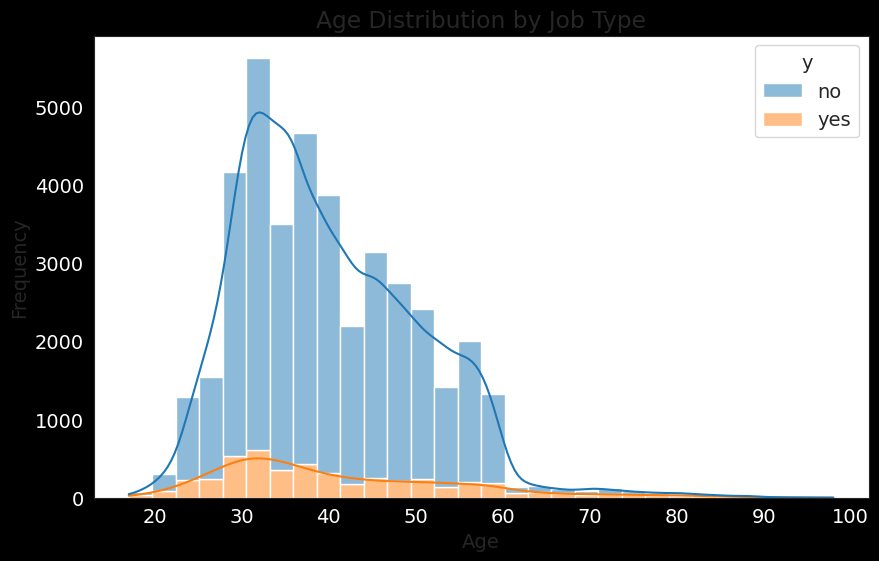

In [13]:
sns.histplot(data=bank_additional_full, x='age', hue='y', bins=30, kde=True, multiple="stack")
plt.title('Age Distribution by Job Type')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.tick_params(axis='both', colors='white')
plt.show()


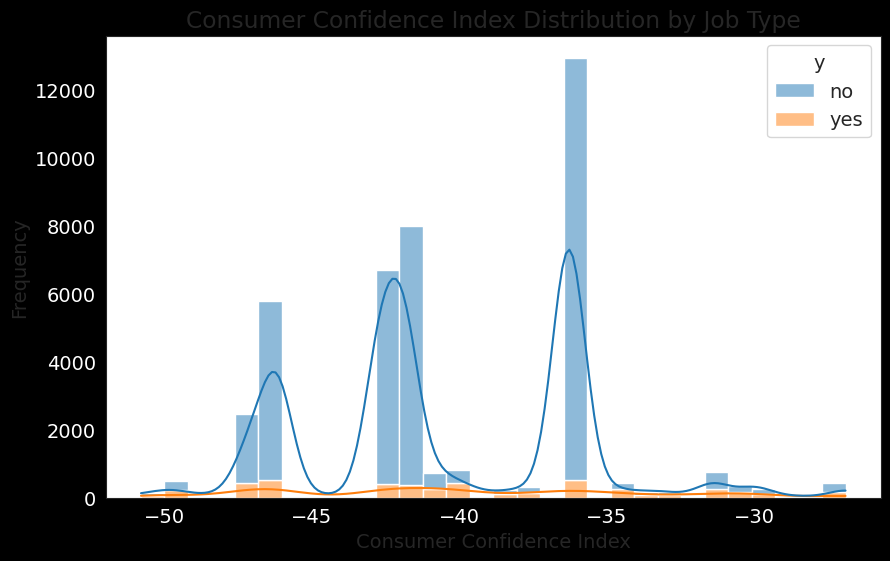

In [14]:
# Histogram with hue='y' showing a yes or no with different colors, and kde=True represetning kernel density estimate (visualize the distribution's shape)
sns.histplot(data=bank_additional_full, x='cons.conf.idx', hue='y', bins=30, kde=True, multiple="stack")
plt.title('Consumer Confidence Index Distribution by Job Type')
plt.xlabel('Consumer Confidence Index')
plt.ylabel('Frequency')
plt.tick_params(axis='both', colors='white')
plt.show()

Histograms Between A Categorical Column (e.g. 'marital', 'education', 'default', 'housing', 'loan', 'month', 'day_of_week', 'duration', 'campaign', 'poutcome') and numerical_columns (	age,	duration,	campaign,	pdays,	previous,	emp.var.rate	cons.price.idx	cons.conf.idx	euribor3m	nr.employed)

In [15]:
px.histogram(bank_additional_full, x='age', title='Age Distribution', color='y')

In [16]:
px.histogram(bank_additional_full, x='job', title='Age Distribution', color='y')

In [17]:
px.histogram(bank_additional_full,
             x='cons.conf.idx',
             color='y',
             title='Consumer Confidence Index Distribution')

In [18]:
df = bank_additional_full.copy()

In [19]:
df.head(2)

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [20]:
px.scatter(df.sample(1000),
           x='age',
           y='duration',
           title='Age vs Duration',
           color='y')

In [21]:
px.scatter(df.sample(2000),
           x='euribor3m',
           y='nr.employed',
           color='y',
           title='Euribor 3-month Rate vs Number of Employees')

## Training, Validation and Test Sets

While building real-world machine learning models, it is quite common to split the dataset into three parts:

1. **Training set** - used to train the model, i.e., compute the loss and adjust the model's weights using an optimization technique.


2. **Validation set** - used to evaluate the model during training, tune model hyperparameters (optimization technique, regularization etc.), and pick the best version of the model. Picking a good validation set is essential for training models that generalize well. [Learn more here.](https://www.fast.ai/2017/11/13/validation-sets/)


3. **Test set** - used to compare different models or approaches and report the model's final accuracy. For many datasets, test sets are provided separately. The test set should reflect the kind of data the model will encounter in the real-world, as closely as feasible.


<img src="https://i.imgur.com/j8eITrK.png" width="480">


As a general rule of thumb you can use around 60% of the data for the training set, 20% for the validation set and 20% for the test set. If a separate test set is already provided, you can use a 75%-25% training-validation split.


When rows in the dataset have no inherent order, it's common practice to pick random subsets of rows for creating test and validation sets. This can be done using the `train_test_split` utility from `scikit-learn`. Learn more about it here: https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html

In [22]:
!pip install scikit-learn --quiet

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
X = df.drop(columns=['y'])
y = df['y']

In [25]:
# Step 1: Split into train+val and test sets
X_train_val, X_test, y_train_val, y_test = train_test_split(X, y, test_size=0.2, random_state=42, stratify=y)

# Step 2: Split train + val into training and validation sets
X_train, X_val, y_train, y_val = train_test_split(X_train_val, y_train_val, test_size=0.3, random_state=42, stratify=y_train_val)
print(f"Train set size: {len(X_train)}")
print(f"Validation set size: {len(X_val)}")
print(f"Test set size: {len(X_test)}")

Train set size: 23065
Validation set size: 9885
Test set size: 8238


In [26]:
print('Train set shape :', X_train.shape)
print('Validation set shape :', X_val.shape)
print('Test set shape :', X_test.shape)

Train set shape : (23065, 20)
Validation set shape : (9885, 20)
Test set shape : (8238, 20)


In [27]:
X_train

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
37719,24,admin.,single,university.degree,no,no,no,cellular,aug,thu,147,1,999,1,failure,-2.9,92.201,-31.4,0.851,5076.2
19714,58,unemployed,married,professional.course,unknown,no,no,cellular,aug,thu,123,3,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
38652,28,self-employed,married,professional.course,no,yes,no,cellular,nov,tue,179,1,999,0,nonexistent,-3.4,92.649,-30.1,0.720,5017.5
10319,37,admin.,divorced,university.degree,no,no,no,telephone,jun,mon,147,1,999,0,nonexistent,1.4,94.465,-41.8,4.960,5228.1
30542,20,technician,single,university.degree,no,no,no,cellular,may,mon,237,5,999,0,nonexistent,-1.8,92.893,-46.2,1.354,5099.1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
262,42,technician,married,high.school,no,no,no,telephone,may,mon,361,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
18229,37,technician,married,professional.course,no,yes,no,telephone,jul,wed,242,4,999,0,nonexistent,1.4,93.918,-42.7,4.963,5228.1
24846,40,blue-collar,married,basic.4y,no,no,no,cellular,nov,tue,181,1,999,1,failure,-0.1,93.200,-42.0,4.153,5195.8
22194,30,technician,single,professional.course,no,yes,no,cellular,aug,thu,76,1,999,0,nonexistent,1.4,93.444,-36.1,4.963,5228.1


In [28]:
X_val

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19024,47,services,married,high.school,no,yes,no,cellular,aug,tue,836,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
9740,45,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,mon,553,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
5271,31,entrepreneur,married,basic.6y,no,yes,no,telephone,may,fri,108,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
32077,31,admin.,single,university.degree,unknown,yes,yes,cellular,may,fri,440,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
24311,55,management,married,basic.4y,no,no,no,cellular,nov,mon,330,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,42,services,married,high.school,no,no,no,cellular,may,wed,990,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
35285,44,admin.,married,high.school,no,no,no,cellular,may,fri,14,3,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1
9484,34,blue-collar,married,professional.course,no,yes,no,telephone,jun,mon,38,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
33276,33,self-employed,single,high.school,no,yes,yes,cellular,may,tue,113,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1


In [29]:
X_val

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
19024,47,services,married,high.school,no,yes,no,cellular,aug,tue,836,1,999,0,nonexistent,1.4,93.444,-36.1,4.968,5228.1
9740,45,blue-collar,married,basic.4y,unknown,yes,no,telephone,jun,mon,553,2,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
5271,31,entrepreneur,married,basic.6y,no,yes,no,telephone,may,fri,108,3,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0
32077,31,admin.,single,university.degree,unknown,yes,yes,cellular,may,fri,440,1,999,0,nonexistent,-1.8,92.893,-46.2,1.313,5099.1
24311,55,management,married,basic.4y,no,no,no,cellular,nov,mon,330,2,999,0,nonexistent,-0.1,93.200,-42.0,4.191,5195.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
31206,42,services,married,high.school,no,no,no,cellular,may,wed,990,1,999,0,nonexistent,-1.8,92.893,-46.2,1.334,5099.1
35285,44,admin.,married,high.school,no,no,no,cellular,may,fri,14,3,999,0,nonexistent,-1.8,92.893,-46.2,1.250,5099.1
9484,34,blue-collar,married,professional.course,no,yes,no,telephone,jun,mon,38,1,999,0,nonexistent,1.4,94.465,-41.8,4.961,5228.1
33276,33,self-employed,single,high.school,no,yes,yes,cellular,may,tue,113,1,999,0,nonexistent,-1.8,92.893,-46.2,1.291,5099.1


In [30]:
numeric_cols = X_train.select_dtypes(include=np.number).columns.tolist()
categorical_cols = X_train.select_dtypes('object').columns.tolist()

In [31]:
X_train[numeric_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000,23065.000000
mean,39.986343,257.834208,2.569391,961.977152,0.174767,0.087717,93.578786,-40.497490,3.624652,5167.049560
std,10.419539,260.598528,2.785993,188.130448,0.498633,1.568378,0.579648,4.627492,1.734725,72.602289
min,17.000000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.000000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.000000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.000000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.000000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [32]:
X_train[categorical_cols].nunique()

,0
job,12
marital,4
education,8
default,3
housing,3
loan,3
contact,2
month,10
day_of_week,5
poutcome,3


## Imputing Missing Numeric Data

Machine learning models can't work with missing numerical data. The process of filling missing values is called imputation.

<img src="https://i.imgur.com/W7cfyOp.png" width="480">

There are several techniques for imputation, but we'll use the most basic one: replacing missing values with the average value in the column using the `SimpleImputer` class from `sklearn.impute`.

In [33]:
from sklearn.impute import SimpleImputer

In [34]:
median_imputer = SimpleImputer(strategy = 'median')
median_imputer.fit(X_train[numeric_cols])
median_imputer.fit(X_val[numeric_cols])
median_imputer.fit(X_test[numeric_cols])

SimpleImputer(strategy='median')

In [35]:
most_frequent = SimpleImputer(strategy = 'most_frequent')
most_frequent.fit(X_train[categorical_cols])
most_frequent.fit(X_val[categorical_cols])
most_frequent.fit(X_test[categorical_cols])

SimpleImputer(strategy='most_frequent')

Before we perform imputation, let's check the no. of missing values in each numeric column.

In [36]:
X_train[numeric_cols].isna().sum()

,0
age,0
duration,0
campaign,0
pdays,0
previous,0
emp.var.rate,0
cons.price.idx,0
cons.conf.idx,0
euribor3m,0
nr.employed,0


In [37]:
X_train[numeric_cols] = median_imputer.transform(X_train[numeric_cols])
X_val[numeric_cols] = median_imputer.transform(X_val[numeric_cols])
X_test[numeric_cols] = median_imputer.transform(X_test[numeric_cols])

## From sklearn.impute import SimpleImputer -> SimpleImputer(strategy), .fit, & .transform doesn't do anything in this case because there are no missing values

## Scaling Numeric Features

Another good practice is to scale numeric features to a small range of values e.g. $(0,1)$ or $(-1,1)$. Scaling numeric features ensures that no particular feature has a disproportionate impact on the model's loss. Optimization algorithms also work better in practice with smaller numbers.

The numeric columns in our dataset have varying ranges.

In [38]:
df[numeric_cols].describe()

,age,duration,campaign,pdays,previous,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
count,41188.00000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000,41188.000000
mean,40.02406,258.285010,2.567593,962.475454,0.172963,0.081886,93.575664,-40.502600,3.621291,5167.035911
std,10.42125,259.279249,2.770014,186.910907,0.494901,1.570960,0.578840,4.628198,1.734447,72.251528
min,17.00000,0.000000,1.000000,0.000000,0.000000,-3.400000,92.201000,-50.800000,0.634000,4963.600000
25%,32.00000,102.000000,1.000000,999.000000,0.000000,-1.800000,93.075000,-42.700000,1.344000,5099.100000
50%,38.00000,180.000000,2.000000,999.000000,0.000000,1.100000,93.749000,-41.800000,4.857000,5191.000000
75%,47.00000,319.000000,3.000000,999.000000,0.000000,1.400000,93.994000,-36.400000,4.961000,5228.100000
max,98.00000,4918.000000,56.000000,999.000000,7.000000,1.400000,94.767000,-26.900000,5.045000,5228.100000


In [39]:
from sklearn.preprocessing import MinMaxScaler

In [40]:
# Scale numeric features
scaler = MinMaxScaler().fit(X_train[numeric_cols])
scaler.fit(X_val[numeric_cols])
scaler.fit(X_test[numeric_cols])

X_train[numeric_cols] = scaler.transform(X_train[numeric_cols])
X_val[numeric_cols] = scaler.transform(X_val[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

## Encoding Categorical Data

Since machine learning models can only be trained with numeric data, we need to convert categorical data to numbers. A common technique is to use one-hot encoding for categorical columns.

<img src="https://i.imgur.com/n8GuiOO.png" width="640">

One hot encoding involves adding a new binary (0/1) column for each unique category of a categorical column.

In [41]:
# Import OneHotEncoder
from sklearn.preprocessing import OneHotEncoder

In [42]:
encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore').fit(X_train[categorical_cols])
encoded_cols = list(encoder.get_feature_names_out(categorical_cols))
X_train[encoded_cols] = encoder.transform(X_train[categorical_cols])
X_val[encoded_cols] = encoder.transform(X_val[categorical_cols])
X_test[encoded_cols] = encoder.transform(X_test[categorical_cols])

# Model Training and Evaluation

In [43]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import joblib

In [44]:
# Select the columns to be used for training/prediction
X_train = X_train[numeric_cols + encoded_cols]
X_val = X_val[numeric_cols + encoded_cols]
X_test = X_test[numeric_cols + encoded_cols]

In [45]:
# Create and train the model
model = LogisticRegression(solver='liblinear')
model.fit(X_train, y_train)

LogisticRegression(solver='liblinear')

In [46]:
modelVal = LogisticRegression(solver='liblinear')
modelVal.fit(X_val, y_val)

LogisticRegression(solver='liblinear')

In [47]:
modelTest = LogisticRegression(solver='liblienar')
model.fit(X_test, y_test)

LogisticRegression(solver='liblinear')

In [48]:
train_preds = model.predict(X_train)
val_preds = modelVal.predict(X_val)

In [49]:
train_probs = model.predict_proba(X_train)
val_probs = modelVal.predict_proba(X_val)

In [50]:
val_probs

array([[0.80123402, 0.19876598],
       [0.95084663, 0.04915337],
       [0.98855762, 0.01144238],
       ...,
       [0.99083939, 0.00916061],
       [0.96651461, 0.03348539],
       [0.96778676, 0.03221324]])

In [51]:
accuracy_score(y_train, train_preds)

0.9093431606329937

In [52]:
accuracy_score(y_val, val_preds)

0.9078401618614061

# Helper function to predict, compute accuracy & plot confusion matrix

In [53]:
from sklearn.metrics import confusion_matrix
def predict_and_plot(inputs, targets, name=''):
    preds = model.predict(inputs)
    accuracy = accuracy_score(targets, preds)
    print(f"Accuracy of the model on the {name} set: {accuracy * 100}")
    cf = confusion_matrix(targets, preds, normalize='true')
    plt.figure(figsize=(10, 8))
    sns.heatmap(cf, annot=True, cmap='Blues')
    plt.xlabel('Predicted labels', color='green', fontsize=16)
    plt.ylabel('True labels', color='green', fontsize=16)
    plt.title(f"Confusion Matrix for the {name} set", color='white', fontsize=20, fontweight='bold')
    plt.tick_params(axis='both', colors='white')
    plt.show()
    return preds

Evaluate on validation and test set

Accuracy of the model on the Validation set: 90.75366717248356


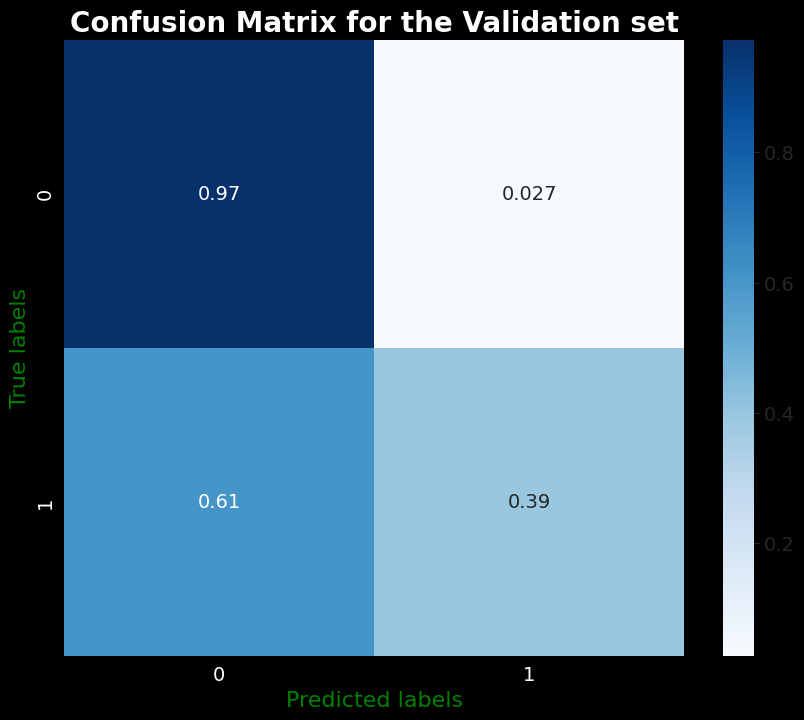

Accuracy of the model on the Test set: 91.34498664724447


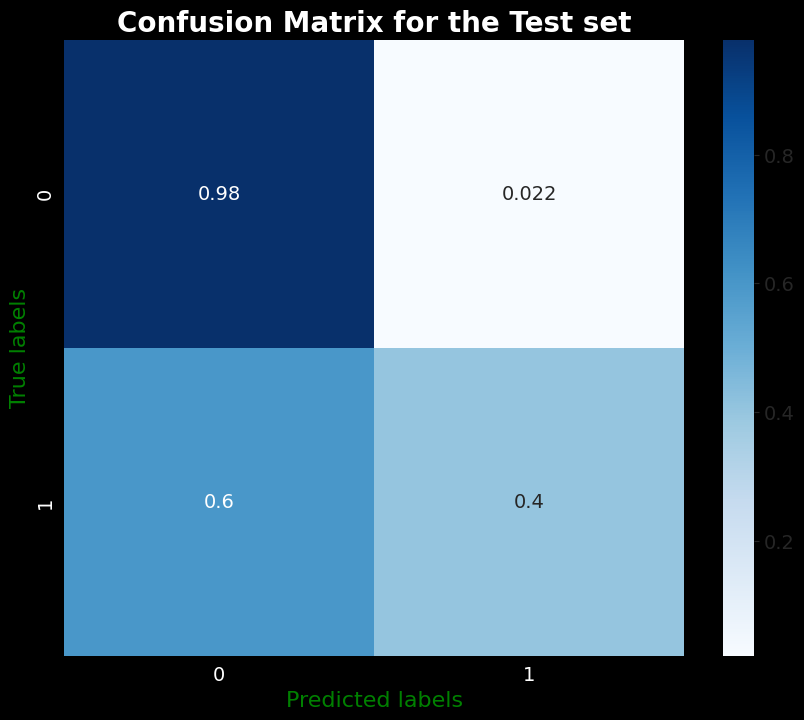

In [54]:
val_preds = predict_and_plot(X_val, y_val, 'Validation')
test_preds = predict_and_plot(X_test, y_test, 'Test')

# Findings: In the Test Set, we achieved an overall accuracy of  about 91.41%, and the Confusion Matrix for the Test Set shows:


1.   True Positives: 41% of the time, when the Logistic Regression model predicted a 'y' for the customer sining up, the customer signed up
2.   True Negatives: 98% of the time, when the Logistic Regression model predicted a 'n' for the customer signing up, the customer didn't sign up
3.   False Positives: 2.1% of the time, when the Logistic Regression model predicted a 'y' for the customer signing up, the customer actually didn't sign up
4.   False Negatives: 59% of the time, when the Logistic Regression model predicted a 'n' for the customer signing up, the customer actually signed up

# Intrepreting the Results


1.   The True Positive accuracy of 41% means the Logistic Regression model has a low accuracy in predicting when a customer will actually sing up
2.   The True Negatives accuracy rate of 98% means the Logistic Regression model does well in predicting if a customer won't sign up, but isn't super useful - we want to find when a customer will sign up, not when they won't.
3.   False Positives: 2.1% is a decently low rate, but it would be better if it's closer to 0.1-0.3%
4.   False Negatives: 59% means we are missing out on a significant chunk of customers who actually did sign up

# Conclusion

1.   A logistic regression model is meant more for factors that assume linearity, rather than datasets that involve complex decision making, nuances, and where many non-linear relationships (e.g. Marital and Education) cannot be captured effectively - making it harder for the model to seperate customers who want to sign up from those who don't.





# Implementing a KNN model with K_neighbors to improve accuracy

In [55]:
from sklearn.cluster import KMeans
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [70]:
# Apply KNN
knn = KNeighborsClassifier(n_neighbors=40, weights = 'uniform', algorithm = 'auto', p = 2)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=40)

In [71]:
# Step 7: Evaluate the model
accuracy = knn.score(X_test, y_test)
print(f"Accuracy of the KNN model on the test set: {accuracy * 100}")

Accuracy of the KNN model on the test set: 89.86404467103665


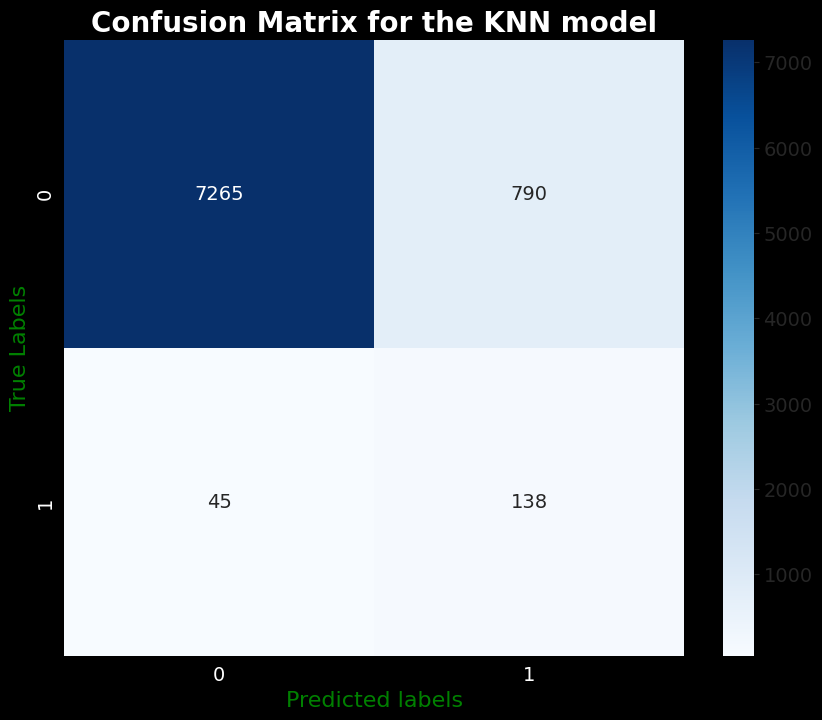

In [72]:
# Plot the KNN model accuracy on a confusion matrix heatmap
pred = knn.predict(X_test)

cf = confusion_matrix(pred, y_test)

plt.figure(figsize=(10, 8))
sns.heatmap(cf, annot=True, fmt='g', cmap='Blues')
plt.xlabel('Predicted labels', color='green', fontsize=16)
plt.ylabel('True Labels', color='green', fontsize=16)
plt.title('Confusion Matrix for the KNN model', color='white', fontsize=20, fontweight='bold')
plt.tick_params(axis='both', colors='white')
plt.show()

In [74]:
from sklearn.metrics import classification_report

class_report = classification_report(y_test, pred)
print("Classification report for KNN model: ", class_report)

Classification report for KNN model:                precision    recall  f1-score   support

          no       0.90      0.99      0.95      7310
         yes       0.75      0.15      0.25       928

    accuracy                           0.90      8238
   macro avg       0.83      0.57      0.60      8238
weighted avg       0.89      0.90      0.87      8238

